In [40]:
%ls ~/data/data/bike-sharing-demand

sampleSubmission.csv  test.csv  train.csv


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import minmax_scale

In [42]:
# (1) 데이터 가져오기
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [43]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [44]:
# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
train['datetime'] = pd.to_datetime(train['datetime'])
train['year']=train[ "datetime"].dt.year
train['month']=train[ "datetime"].dt.month
train['day']=train[ "datetime"].dt.day
train['hour']=train[ "datetime"].dt.hour
train['minute']=train[ "datetime"].dt.minute
train['second']=train[ "datetime"].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

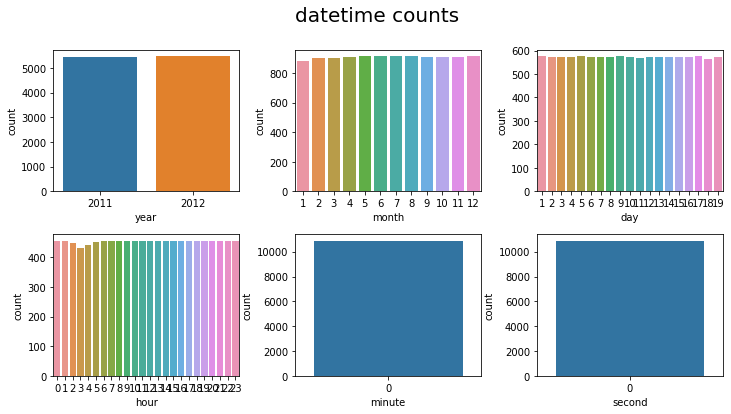

In [45]:
# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('datetime counts', fontsize=20)

subplot = plt.subplot(2,3,1)
sns.countplot(x='year', data=train)
subplot = plt.subplot(2,3,2)
sns.countplot(x='month', data=train)
subplot = plt.subplot(2,3,3)
sns.countplot(x='day', data=train)
subplot = plt.subplot(2,3,4)
sns.countplot(x='hour', data=train)
subplot = plt.subplot(2,3,5)
sns.countplot(x='minute', data=train)
subplot = plt.subplot(2,3,6)
sns.countplot(x='second', data=train)

plt.show()

In [46]:
# (4) train, y 컬럼 선택 및 train/test 데이터 분리

# Min-max 스케일링
X_scaled = minmax_scale(train.drop(['datetime', 'casual', 'registered', 'count', 'minute', 'second'], axis=1))
X = pd.DataFrame(X_scaled, columns=train.drop(['datetime', 'casual', 'registered', 'count', 'minute', 'second'], axis=1).columns)

y = train['count']

# 훈련, 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# (5) LinearRegression 모델 학습
model = LinearRegression(positive=True)
model.fit(X_train, y_train)

LinearRegression(positive=True)

In [48]:
# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("모델 예측 값: 
", y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 21221.111893028705
RMSE: 145.67467828359432
R2: 0.3570711325704208


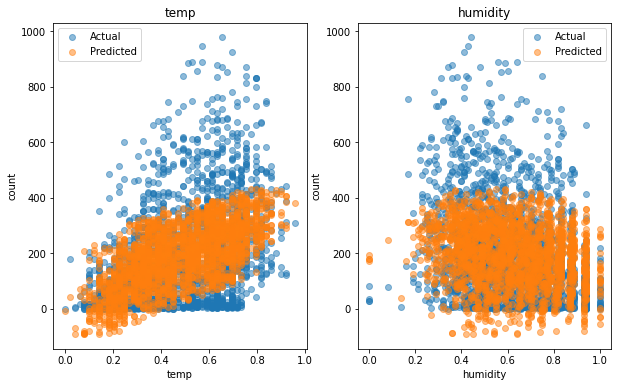

In [49]:
# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test['temp'], y_test, label='Actual', alpha=0.5)
plt.scatter(X_test['temp'], y_pred, label='Predicted', alpha=0.5)
plt.xlabel('temp')
plt.ylabel('count')

plt.title('temp')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test['humidity'], y_test, label='Actual', alpha=0.5)
plt.scatter(X_test['humidity'], y_pred, label='Predicted', alpha=0.5)
plt.xlabel('humidity')
plt.ylabel('count')

plt.title('humidity')
plt.legend()
plt.show()